# First data exploration

------------------
![GitHub](https://img.shields.io/github/license/nicolastolosa/AirBnbModel)

**Author:** Nicolás Tolosa (github nicolastolosa)

**Achievements:** **(1)** Characterization of the two main datasets (``users.csv`` and ``sessions.csv``). Description and visualization of the columns, analysis of the datatypes, null values, invalid values... **(2)** Analysis of the intersection between ``users.csv`` and ``sessions.csv`` **(3)** Analysis of the distribution of the main variables for both datasets.

-------------
### Introduction <a class="tocSkip"> </a>

The purpose of this notebook is to perform a first analysis of the datasets (``users`` and ``sessions``), in order to get to know the basic structure of the data, to be able to separate a subset of both datasets with hypothesis testing purposes.

This analysis doesn't pretend to be a full-depth exploratory analysis (which will be performed later on), as a testing dataset for validating conclusions hasn't been created yet. 

In this notebook, the structure, datatypes and null values of each of the columns of ``users`` and ``sessions`` datasets will be explored, the distribution of the different variables will be plotted, and the intersection between both datasets will be analyzed.

### Summary of the analysis <a class="tocSkip"> </a> 

1. The ``target`` variable is highly unbalanced. 61% of the users has not made any reservation (NDF). From the remaining 39% of users who have made a reservation, 68% of them booked to the US.


2. Most of the columns in both datasets are categorical vales. There are only 2 numerical columns (age and secs_elapsed)


3. Some of the categorical columns include a high number of different categories, particularly in ``sessions`` dataset (for example ``action`` contains 360 different categories). 75% of the values are located in the top 12 categories.


4. Only 73.815 out of 275.119 (27%) of all unique users are present in both datasets.


5. Some outliers were identifyed on ``age`` variable on ``users`` dataset (some of the ages are above 1000 years). **Must be further analyzed and treated**.


6. The variable ``secs_elapsed`` on ``sessions`` dataset, contains numbers with a high variance (min: 0, max: 1.799.977). This variable represents the time between two actions on the website, which means that values above a threshold (to define) can be related to a user leaving the website. **This variable can be useful to identify the different visits to the website made by each user**. For this variable to be used, it will need to be analyzed and processed in further detail.


### Important notes!  <a class="tocSkip"> </a>
**The data necessary to run this notebook, has not been included in the repository due to license limitations. Before running this notebook, make sure to run the code in ``AirBnbModel/notebooks/01_download_data/notebook.ipynb`` to download the data into ``AirBnbModel/notebooks/exploration_data/``**

<div class="alert alert-block alert-warning">
<b>Warning:</b> For the data of this project to be accessible, the terms and conditions of the Kaggle competition must be accepted first. Details can be found in the following page: <a href="https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data"> Airbnb New User Bookings | Kaggle </a>
    
</div>

----------

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Libraries" data-toc-modified-id="1.-Libraries-1">1. Libraries</a></span></li><li><span><a href="#2.-Users.csv-dataset-characterization" data-toc-modified-id="2.-Users.csv-dataset-characterization-2">2. <code>Users.csv</code> dataset characterization</a></span><ul class="toc-item"><li><span><a href="#2.1-General-information" data-toc-modified-id="2.1-General-information-2.1">2.1 General information</a></span></li><li><span><a href="#2.2-Visualization-of-some-rows" data-toc-modified-id="2.2-Visualization-of-some-rows-2.2">2.2 Visualization of some rows</a></span></li><li><span><a href="#2.3-Data-types-and-null-values" data-toc-modified-id="2.3-Data-types-and-null-values-2.3">2.3 Data types and null values</a></span></li><li><span><a href="#2.4-Invalid-rows" data-toc-modified-id="2.4-Invalid-rows-2.4">2.4 Invalid rows</a></span></li></ul></li><li><span><a href="#3.-sessions.csv-dataset-characterization" data-toc-modified-id="3.-sessions.csv-dataset-characterization-3">3. <code>sessions.csv</code> dataset characterization</a></span><ul class="toc-item"><li><span><a href="#3.1-General-information" data-toc-modified-id="3.1-General-information-3.1">3.1 General information</a></span></li><li><span><a href="#3.2-Visualization-of-some-rows" data-toc-modified-id="3.2-Visualization-of-some-rows-3.2">3.2 Visualization of some rows</a></span></li><li><span><a href="#3.3-Data-types-and-null-values" data-toc-modified-id="3.3-Data-types-and-null-values-3.3">3.3 Data types and null values</a></span></li><li><span><a href="#3.4-Invalid-rows" data-toc-modified-id="3.4-Invalid-rows-3.4">3.4 Invalid rows</a></span></li></ul></li><li><span><a href="#4.-Cross-between-users-and-sessions-datasets" data-toc-modified-id="4.-Cross-between-users-and-sessions-datasets-4">4. Cross between <code>users</code> and <code>sessions</code> datasets</a></span><ul class="toc-item"><li><span><a href="#4.1-Selection-of-the-subset-of-valid-IDs" data-toc-modified-id="4.1-Selection-of-the-subset-of-valid-IDs-4.1">4.1 Selection of the subset of valid IDs</a></span></li></ul></li><li><span><a href="#5.-Distribution-of-variables-in-users-dataset" data-toc-modified-id="5.-Distribution-of-variables-in-users-dataset-5">5. Distribution of variables in <code>users</code> dataset</a></span><ul class="toc-item"><li><span><a href="#5.1-Distribution-of-the-target-variable-country_destination" data-toc-modified-id="5.1-Distribution-of-the-target-variable-country_destination-5.1">5.1 Distribution of the target variable <code>country_destination</code></a></span></li><li><span><a href="#5.2-Distribution-of-the-categorical-variables" data-toc-modified-id="5.2-Distribution-of-the-categorical-variables-5.2">5.2 Distribution of the categorical variables</a></span></li><li><span><a href="#5.3-Distribution-of-the-numerical-variables" data-toc-modified-id="5.3-Distribution-of-the-numerical-variables-5.3">5.3 Distribution of the numerical variables</a></span></li></ul></li><li><span><a href="#6.-Distribution-of-variables-in-sessions-dataset" data-toc-modified-id="6.-Distribution-of-variables-in-sessions-dataset-6">6. Distribution of variables in <code>sessions</code> dataset</a></span><ul class="toc-item"><li><span><a href="#6.1-Distribution-of-the-categorical-variables" data-toc-modified-id="6.1-Distribution-of-the-categorical-variables-6.1">6.1 Distribution of the categorical variables</a></span></li><li><span><a href="#6.2-Distribution-of-the-numerical-variables-" data-toc-modified-id="6.2-Distribution-of-the-numerical-variables--6.2">6.2 Distribution of the numerical variables <a class="anchor" id="6_2" rel="nofollow"></a></a></span></li></ul></li></ul></div>

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-08-24T16:00:01.031797+02:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.21.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit



## 1. Libraries
------------------

In [2]:
# Set /notebooks dir to path to import modules
import sys, os
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [3]:
# Import libraries
# ----------------

# system
import os

# data manipulation
import pandas as pd

# Visualization
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

from modules.plots import column_autolabel, apply_venn_format

plt.style.use('ggplot')
sns.set(style='whitegrid', palette='Blues_d')

In [4]:
# Root path of the data
ROOT_PATH = '../exploration_data/01_raw'

## 2. ``Users.csv`` dataset characterization
------------------

In [5]:
# Loading users data
users_path = os.path.join(ROOT_PATH, 'train_users_2.csv')
users = pd.read_csv(users_path)

### 2.1 General information
``users.csv`` dataset contains all the data available that it's associated to the users that have signed-up at *AirBnb's* website during a determinated period of time. 

<blockquote>This dataset <b>contains the <i>target</i> variable</b>, which represents the country of destination of the first reservation for each of the users. </blockquote>

In the following table, a description of all the columns contained in the dataset can be found:

| Column name | Description | Additional information |
| :- | :- | :- |
| ***id (str)*** | Unique user ID. |
| ***date_account_created (date)*** | Date in which the user account was created. |
| ***timestamp_first_active (date)*** | Date of the first time in which the user performed an action in the website of *AirBnb*. |  This date can be prior to *date_account_created.*
| ***date_first_booking (date)*** | Date of the first booking. | Only available for those users who have made any reservation.
| ***gender (category)*** | Gender of the user. |
| ***age (int)*** | Age of the user at the time the dataset was created. | 
| ***signup_method (category)*** | Shows the method used to sign-up. |
| ***signup_flow (category)*** | Integer number showing the type of the page visited by the user before signing-up. | *There is no information available about what each of the possible values mean.* |
| ***language (category)*** | Language preference. |
| ***affiliate_channel (category)*** | Marketing affiliate channel tracked in the session in which the user signed up on the website. |
| ***affiliate_provider (category)*** | Further detail about the marketing affiliate tracked in the session in which the user signed up on the website. |
| ***first_affiliate_tracked (category)*** |  | *No information available about the meaning of this field.* | 
| ***signup_app (category)*** | Type of aplication used at the moment of signing-up. |
| ***first_device_type (category)*** | Type of device (OS + desktop/mobile) used at the moment of signing-up. |
| ***first_browser (category)*** | Browser used at the moment of signing-up. |
| ***country_destination (category)*** | Country of destination of the first reservation. | ***Target variable***. <br> *Categorical value that can belong to any of the following: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF'* <br> ***NDF referst to the users that have not made any reservation yet.*** |

### 2.2 Visualization of some rows

In [6]:
# First 5 rows
display(users.head())

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [7]:
# 5 random rows
display(users.sample(5, random_state = 10))

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
172278,a8gndtranj,2014-04-06,20140406052848,2014-05-01,FEMALE,56.0,basic,0,en,direct,direct,omg,Web,iPad,Mobile Safari,US
156260,hatqii2e7x,2014-02-24,20140224071308,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF
188288,rdwnjerdjb,2014-05-13,20140513042933,2014-05-31,FEMALE,51.0,facebook,0,en,sem-non-brand,google,linked,Web,Windows Desktop,IE,US
108374,lxhyvtnaa6,2013-09-17,20130917170211,NaN,-unknown-,NaN,basic,0,en,seo,google,linked,Web,Mac Desktop,Chrome,NDF
187737,uwvlyetqhr,2014-05-12,20140512040832,2015-04-04,MALE,27.0,facebook,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,US


In [8]:
# Last 5 rows
display(users.tail())

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


### 2.3 Data types and null values

 - The dataset consists on **213.451 rows with a total of 15 columns, plus an ID column.**

 - **11 of the columns are categorical** values, while **2 are dates**, **1 contains a timestamp** and the last one corresponds to a **numerical value (int).**

 - **Null values** can be found in the columns *date_first_booking* (58%), *age* (41%) y  *first_affiliate_tracked* (2.8%).

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [10]:
pct_null_users = round(100 * users.isnull().sum() / users.shape[0], 2)
print(pct_null_users)

id                          0.00
date_account_created        0.00
timestamp_first_active      0.00
date_first_booking         58.35
gender                      0.00
age                        41.22
signup_method               0.00
signup_flow                 0.00
language                    0.00
affiliate_channel           0.00
affiliate_provider          0.00
first_affiliate_tracked     2.84
signup_app                  0.00
first_device_type           0.00
first_browser               0.00
country_destination         0.00
dtype: float64


As it can be seen from previous lines, pandas used by default *object* datatype for most of the columns. This is not a proper format as, underneath it refers to a python object, which makes the code much slower and heavy. 

In the following code, the datetypes of the dataset are converted to a proper format: datetimes are parsed, and *object* datetypes are converted to pandas *category* objects (missing values for categories are filled with **missing**).

As it can be seen, **memory usage has reduced to almost half by converting datatypes**.

In [11]:
users_2 = (
    users
    .set_index('id')
    .astype({'date_account_created': 'datetime64', 'date_first_booking': 'datetime64'})
    .assign(timestamp_first_active=lambda _df: pd.to_datetime(_df.timestamp_first_active, format='%Y%m%d%H%M%S'))
    .fillna({'first_affiliate_tracked': 'missing'})
    .astype({
        'gender': 'category',
        'signup_method': 'category',
        'signup_flow': 'category',
        'language': 'category',
        'affiliate_channel': 'category',
        'affiliate_provider': 'category',
        'first_affiliate_tracked': 'category',
        'signup_app': 'category',
        'first_device_type': 'category',
        'first_browser': 'category',
        'country_destination': 'category'
    })
)
    
users_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     213451 non-null  datetime64[ns]
 1   timestamp_first_active   213451 non-null  datetime64[ns]
 2   date_first_booking       88908 non-null   datetime64[ns]
 3   gender                   213451 non-null  category      
 4   age                      125461 non-null  float64       
 5   signup_method            213451 non-null  category      
 6   signup_flow              213451 non-null  category      
 7   language                 213451 non-null  category      
 8   affiliate_channel        213451 non-null  category      
 9   affiliate_provider       213451 non-null  category      
 10  first_affiliate_tracked  213451 non-null  category      
 11  signup_app               213451 non-null  category      
 12  first_de

### 2.4 Invalid rows

For the data of this dataset to be considered valid, the following requirements must be met:

1. There are not duplicated values for the column *ID*.
2. There are not null values for *target* column (``country_destination``).

As it can be seen from the following code snippet, **there are not invalid rows in ``users`` dataset.**

In [12]:
duplicated_IDs = users_2.index.duplicated().sum()
print(f"There are {duplicated_IDs} duplicated values in id column of users dataset.")

There are 0 duplicated values in id column of users dataset.


In [13]:
target_null = users_2.country_destination.isnull().sum()
print(f"There are {target_null} null values in country_destination column of the users dataset.")

There are 0 null values in country_destination column of the users dataset.


## 3. ``sessions.csv`` dataset characterization
------------------

In [14]:
# Loading users data
sessions_path = os.path.join(ROOT_PATH, 'sessions.csv')
sessions = pd.read_csv(sessions_path)

### 3.1 General information
``sessions.csv`` dataset contains information about the sequence of actions made by the users of ``users.csv`` dataset on the website of *AirBnb*. 

There is a list of actions performed by each of the users and the sequence of actions is ordered in such a way that the first actions for each user are located deeper in the dataset.

In the following table, a description of all the columns contained in the dataset can be found:


| Column name | Description | Additional information |
| :- | :- | :- |
| ***user_id*** | Unique user identifyer, that can be matched with *user_id* of ``users.csv`` | *In this dataser, each row corresponds to an action made by a user. Thus, there may exist several rows for each user, meaning this field does not act as a Primary Key of this dataset.*
| ***action*** | Detail of the action. | *(Level 1)* |
| ***action_type*** | Detail of the action. | *(Level 2)* |
| ***action_detail*** | Detail of the action. | *(Level 3)* |
| ***device_type*** | Device used when the action was registered. |
| ***secs_elapsed*** | Time elapsed between two consecutive actions. | *As mentioned above, the actions are ordered cronologically, meaning that the most recent actions for each user are located in the upper columns.* |

### 3.2 Visualization of some rows

Next, some rows of the dataset will be visualized, to have a better sense of the structure of the data.

It can be seen that each row shows an action associated to a user, and that the fileds ``action``, ``action_type`` and ``action_detail`` show a hierarchy of the detail of the action.

In [15]:
# First 5 rows
display(sessions.head())

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [16]:
# 5 random rows
display(sessions.sample(5, random_state = 10))

,user_id,action,action_type,action_detail,device_type,secs_elapsed
2732335,1ofhn8iyi3,show,view,p3,Tablet,12152.0
3002097,uriuevx1vg,similar_listings,data,similar_listings,Mac Desktop,471.0
785219,nemc1nyrcn,show,NaN,NaN,iPad Tablet,66.0
1839411,6t1zq7bt1c,show,NaN,NaN,Mac Desktop,74.0
6540187,cu63awt6ij,index,-unknown-,-unknown-,Tablet,504.0


In [17]:
# Last 5 rows
display(sessions.tail())

,user_id,action,action_type,action_detail,device_type,secs_elapsed
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0
10567736,9uqfg8txu3,show_personalize,data,user_profile_content_update,Windows Desktop,1221.0


Lastly, all the actions registered for a single user will be visualized. As explained above, it can be seen that the rows show a series of actions performed by the user on the website of *AirBnb*.

It can alse be seen that there is a great variability between the values of the variable ``secs_elapsed``, and that some of the values are excesivelly high (for example: 361277 value means more than 100 days...). 

By interpreting the data, it can be obviously discarded the fact that a user may be on a website for more than 100 days. The possibility of those values being a measure error is also remote, as the quantity of ridiculously high measures on the dataset is quite high. As a result, it can be deduced that those high values **represent different visits to the website**, and that it will be necessary to set a threshold to separate actions performed in the same visit of the website.

This section of the dataset, shows that it will be necessary to make several transformations to the data before being able to perform a proper analysis.

In [18]:
user_sample_sessions = sessions[sessions.user_id == 'omlc9iku7t']
pd.set_option('display.max_rows', user_sample_sessions.shape[0]+1)
display(user_sample_sessions)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
5554407,omlc9iku7t,search_results,click,view_search_results,Mac Desktop,15785.0
5554408,omlc9iku7t,index,view,view_search_results,Mac Desktop,614.0
5554409,omlc9iku7t,personalize,data,wishlist_content_update,Mac Desktop,929.0
5554410,omlc9iku7t,index,view,view_search_results,Mac Desktop,361277.0
5554411,omlc9iku7t,dashboard,view,dashboard,Mac Desktop,195.0
5554412,omlc9iku7t,header_userpic,data,header_userpic,Mac Desktop,822.0
5554413,omlc9iku7t,dashboard,view,dashboard,Mac Desktop,340.0
5554414,omlc9iku7t,confirm_email,click,confirm_email_link,Mac Desktop,47210.0
5554415,omlc9iku7t,signup_login,view,signup_login_page,Mac Desktop,4195.0
5554416,omlc9iku7t,active,-unknown-,-unknown-,-unknown-,355.0


### 3.3 Data types and null values

 - The dataset consists on **10.567.737 rows with a total of 6 columns.**

 - **5 of the attributes are categorical values**, while the last one corresponds to a **numerical value (int).**

In [19]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


The percentage of **null values** present in each column can be found next:

In [20]:
pct_null_sessions = round(100 * sessions.isnull().sum() / sessions.shape[0], 2)
print(pct_null_sessions)

user_id           0.33
action            0.75
action_type      10.66
action_detail    10.66
device_type       0.00
secs_elapsed      1.29
dtype: float64


In [21]:
sessions_2 = (
    sessions
    .set_index('user_id')
    .fillna({
        'action': 'missing',
        'action_type': 'missing',
        'action_detail': 'missing',
        'device_type': 'missing'
    })
    .astype({
        'action': 'category',
        'action_type': 'category',
        'action_detail': 'category',
        'device_type': 'category'
    })
)

sessions_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567737 entries, d1mm9tcy42 to 9uqfg8txu3
Data columns (total 5 columns):
 #   Column         Dtype   
---  ------         -----   
 0   action         category
 1   action_type    category
 2   action_detail  category
 3   device_type    category
 4   secs_elapsed   float64 
dtypes: category(4), float64(1)
memory usage: 221.7+ MB


### 3.4 Invalid rows

For the data of this dataset to be considered valid, the following requirements must be met:

1. ``user_id`` column must not be null.

As it can be seen from the following code snippet, **there are 34.496 rows** in ``sessions`` dataset, for which the field ``user_id`` is not informed. Thus, **these rows are not valid for the analysis and must be discarded.**

In [22]:
sessions_user_id_isnull = sessions_2.index.isnull()
print(f"Field user_id of sessions dataset has {sessions_user_id_isnull.sum()} null values. These rows must be discarded.\n")

sessions_2.query('user_id.isna()',engine='python')

Field user_id of sessions dataset has 34496 null values. These rows must be discarded.



,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
NaN,calendar_tab_inner2,-unknown-,-unknown-,Mac Desktop,4890.0
NaN,create,submit,create_user,Mac Desktop,NaN
NaN,header_userpic,data,header_userpic,Mac Desktop,768.0
NaN,calendar_tab_inner2,-unknown-,-unknown-,Mac Desktop,7578.0
NaN,edit,view,edit_profile,iPad Tablet,6194.0
...,...,...,...,...,...
NaN,personalize,data,wishlist_content_update,Windows Desktop,919.0
NaN,search_results,click,view_search_results,Windows Desktop,6683.0
NaN,search_results,click,view_search_results,Windows Desktop,976.0


## 4. Cross between ``users`` and ``sessions`` datasets
------------------

For the data to be useful for the analysis, every ID must be available at least in the ``users`` dataset (as it contains the target variable). However, in order to dispose of as much data as possible, **only will be considered those IDs that are available in both ``users`` and ``sessions`` datasets.**

In [23]:
sessions_unique_ids = (
    sessions_2
    .reset_index()
    .user_id
    .drop_duplicates()
    .dropna()
    .to_frame()
)

users_unique_ids = (
    users_2
    .reset_index()
    .id
    .drop_duplicates()
    .dropna()
    .to_frame()
)

merged_ids = sessions_unique_ids.merge(
                users_unique_ids,
                how = 'outer',
                left_on = 'user_id',
                right_on = 'id',
                indicator = True
             )


display(merged_ids)

,user_id,id,_merge
0,d1mm9tcy42,d1mm9tcy42,both
1,yo8nz8bqcq,yo8nz8bqcq,both
2,4grx6yxeby,4grx6yxeby,both
3,ncf87guaf0,ncf87guaf0,both
4,4rvqpxoh3h,4rvqpxoh3h,both
...,...,...,...
275114,NaN,h0slfsio2o,right_only
275115,NaN,egeidqlx42,right_only
275116,NaN,v2mo2lxorn,right_only
275117,NaN,ii8kqtg7ca,right_only


The following venn diagram shows the overlap existing between the IDs present on ``users`` dataset and ``sessions`` dataset.
As it can be seen, there are **73.815 IDs that are present in both ``users`` and ``sessions`` datasets, and thus can be used to train a model.**

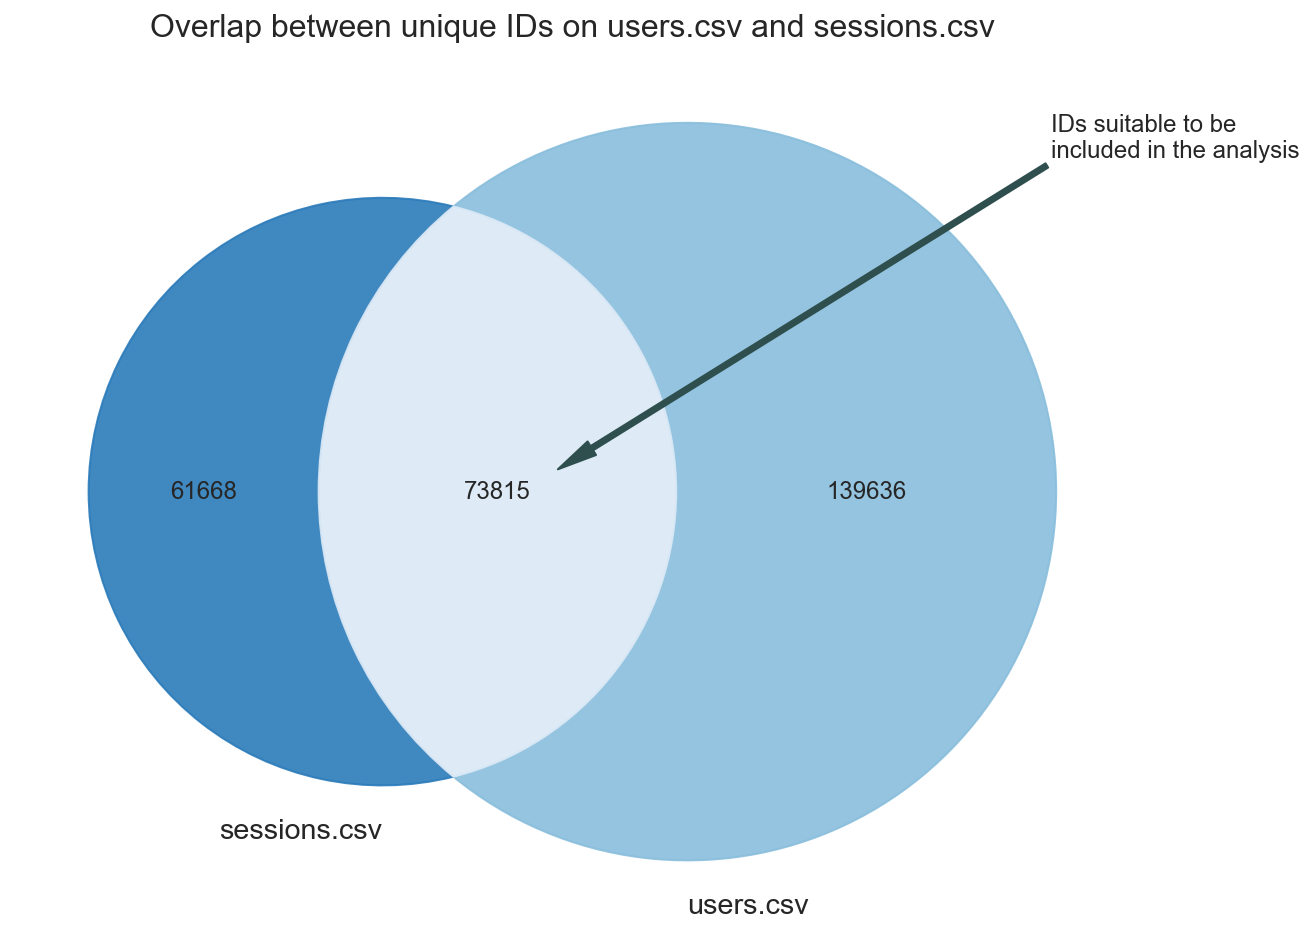

In [24]:
union = merged_ids._merge.value_counts()

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)

diagram = venn2(subsets = (union['left_only'], union['right_only'], union['both']), 
                set_labels = ('sessions.csv', 'users.csv'))

# Formatting
apply_venn_format(diagram, ax)

plt.show()

### 4.1 Selection of the subset of valid IDs
Valid IDs for the analysis will be those that are **present in poth ``sessions`` and ``users`` datasets.**

For selecting the valid IDs, the previously generated dataframe ``merged_ids`` is used, filtering only the IDs where ``_merge`` column is *'both'*.

In [25]:
valid_ids = (
    merged_ids
    .query("_merge == 'both'")
    .id
)
display(valid_ids)

0        d1mm9tcy42
1        yo8nz8bqcq
2        4grx6yxeby
3        ncf87guaf0
4        4rvqpxoh3h
            ...    
73810    zxodksqpep
73811    mhewnxesx9
73812    6o3arsjbb4
73813    jh95kwisub
73814    nw9fwlyb5f
Name: id, Length: 73815, dtype: object

## 5. Distribution of variables in ``users`` dataset
------------------

The following part of the analysis will consist on a series of plots that show the distribution of the variables in ``users`` dataset (filtered to only select IDs present in both ``users`` and ``sessions`` datasets). 

First, the distribution of the *target* variable (``country_destination``) will be analyzed, then all categorical variables will be plotted, and finally the numerical variables will be analyzed.

In [26]:
valid_users = (
    users_2
    .query('id in @valid_ids')
)
display(valid_users.head())

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
4grx6yxeby,2014-01-01,2014-01-01 00:16:39,NaT,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
ncf87guaf0,2014-01-01,2014-01-01 00:21:46,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4rvqpxoh3h,2014-01-01,2014-01-01 00:26:19,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


### 5.1 Distribution of the target variable ``country_destination``


>**61% of the users of the dataset have not made any reservation. From those of which have made a reservation, 69% of them have booked to a first destination located in the US.**

In [27]:
(
    valid_users
    .country_destination
    .value_counts()
    .to_frame()
    .assign(pct=lambda _df: round(100 * _df.country_destination / _df.country_destination.sum(), 2))
)

,country_destination,pct
NDF,45041,61.02
US,20095,27.22
other,3655,4.95
FR,1435,1.94
IT,979,1.33
GB,731,0.99
ES,707,0.96
CA,440,0.60
DE,250,0.34
NL,247,0.33


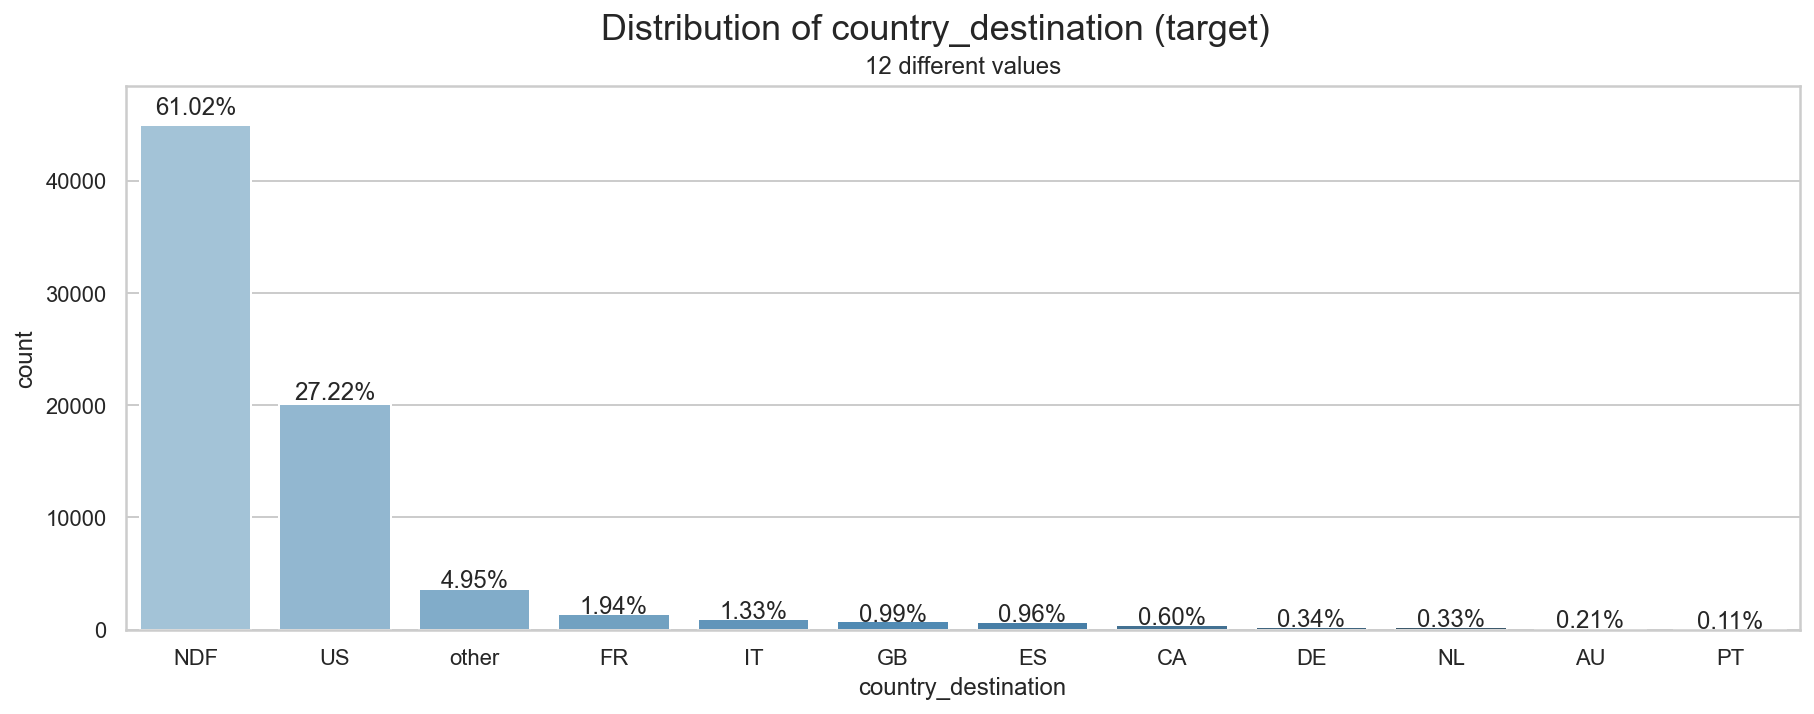

In [28]:
fig = plt.figure(figsize = (15,5))

order = (
    valid_users
    .country_destination
    .value_counts()
    .index
)

ax = sns.countplot(
    data=valid_users,
    x="country_destination",
    order = order,
    palette = 'Blues_d'
)


# Formatting
column_autolabel(ax = ax, total_ratio = valid_users.country_destination.count())

plt.title(f"{order.shape[0]} different values", fontsize = 12)
plt.suptitle('Distribution of country_destination (target)', fontsize = 18)

plt.show()

### 5.2 Distribution of the categorical variables

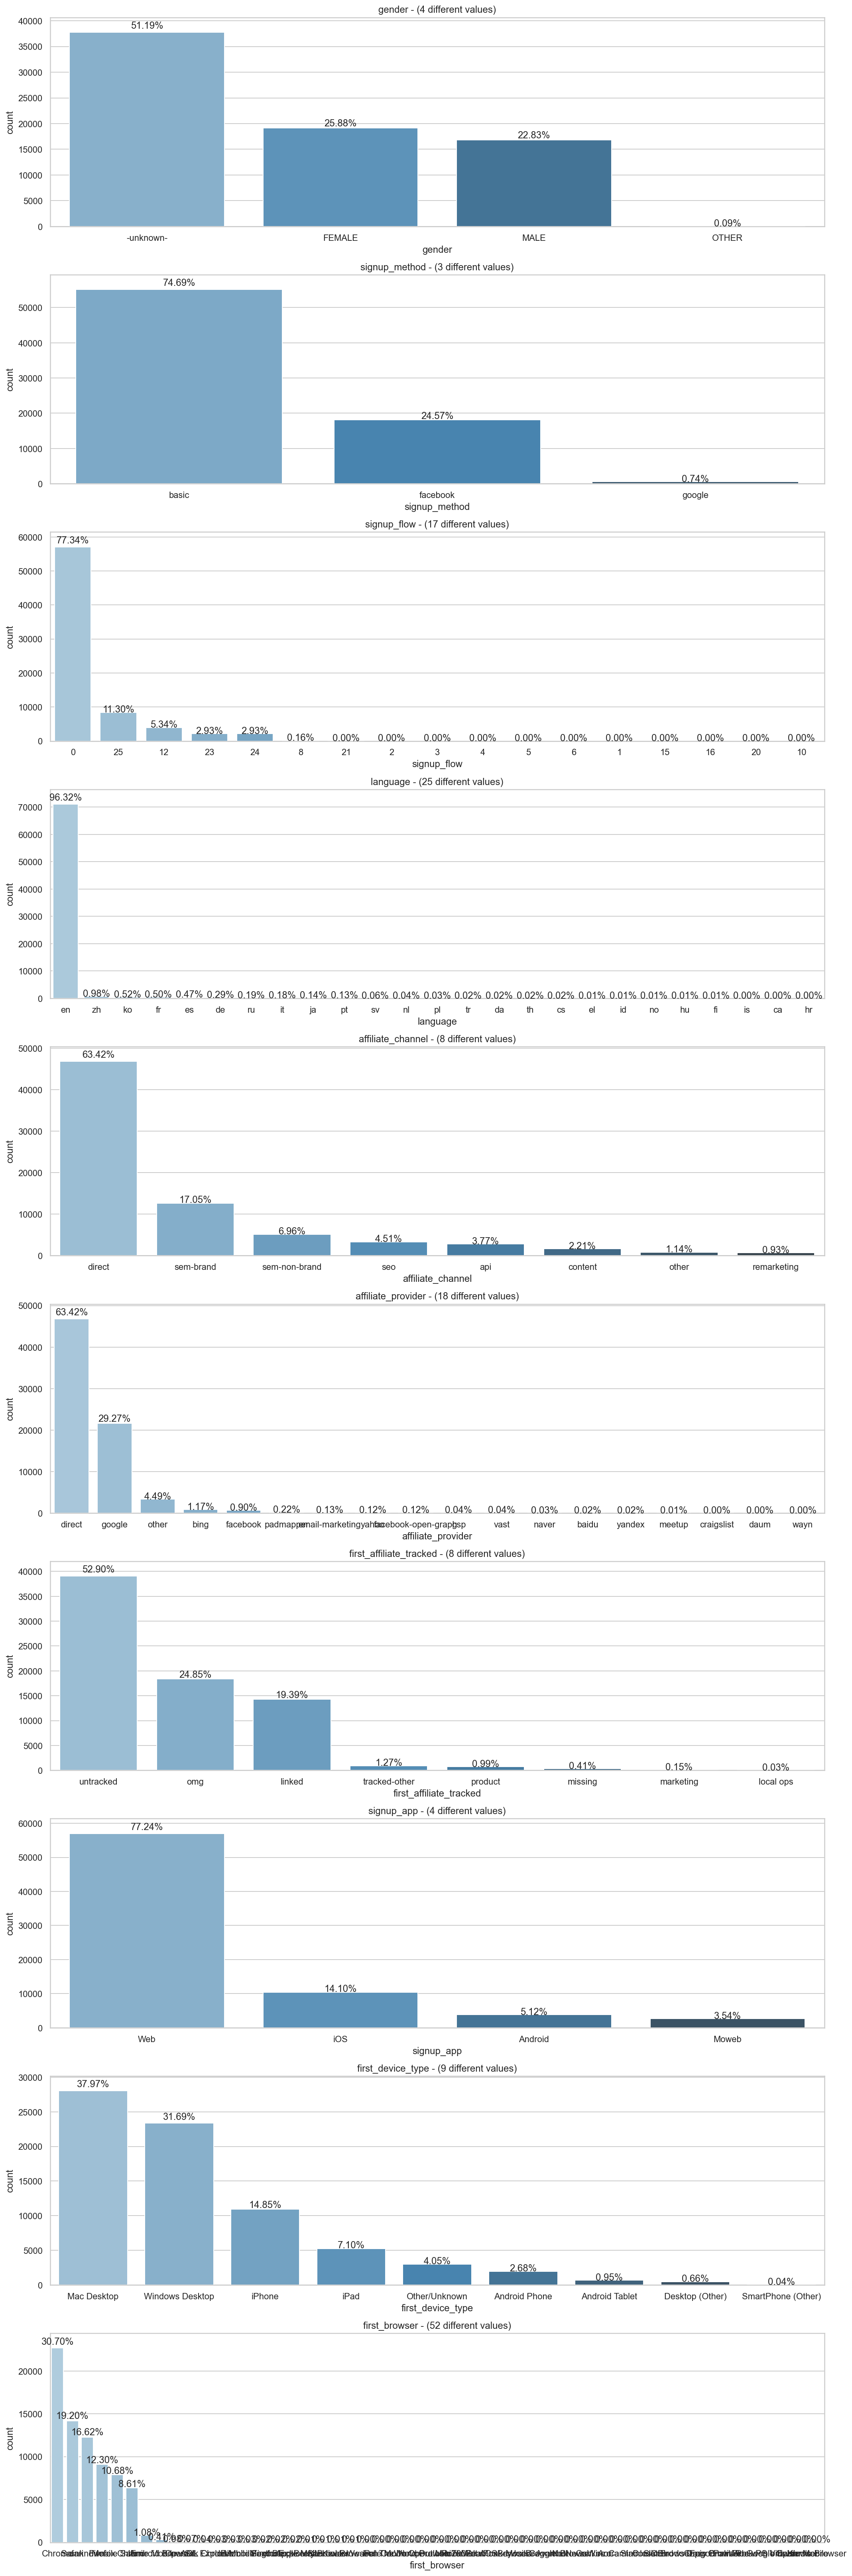

In [29]:
users_categorical = (
    valid_users
    .select_dtypes(['category'])
    .drop(columns = 'country_destination')
)

fig, ax = plt.subplots(users_categorical.columns.shape[0], 1, figsize = (15, 45))

for i, var in enumerate(users_categorical.columns):
    order = (
        users_categorical
        .loc[:, var]
        .value_counts()
    )
    plot = sns.countplot(
        x=var,
        data=users_categorical,
        palette="Blues_d",
        ax = ax[i],
        order=order.index
    )

    # Formatting
    column_autolabel(ax = plot, total_ratio = users_categorical.loc[:, var].count())

    title = (f"{var} - ({order.count()} different values)")
    ax[i].set_title(title)


fig.tight_layout()        
plt.show()

### 5.3 Distribution of the numerical variables

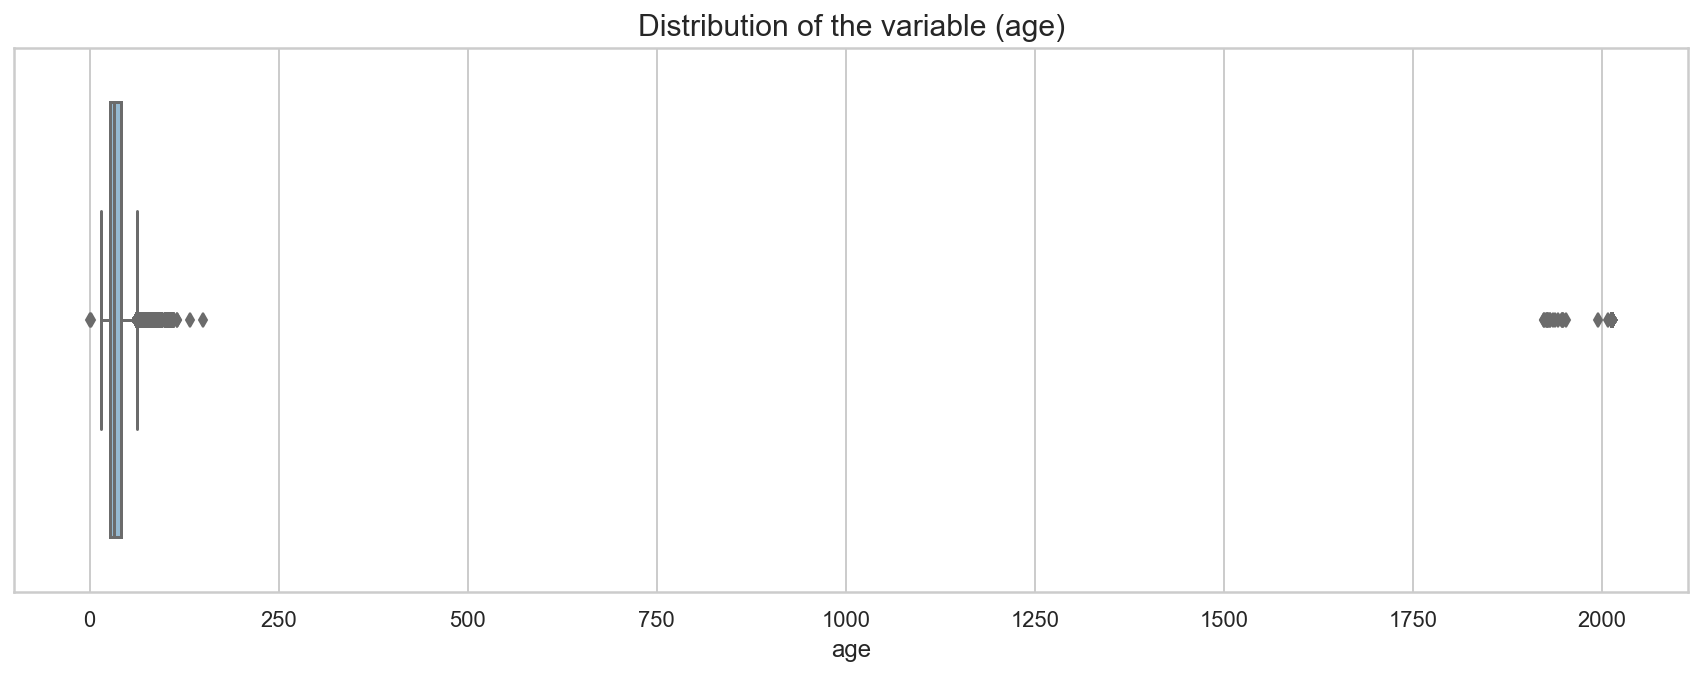

,count,mean,std,min,25%,50%,75%,max
age,41567.0,42.414993,111.201954,1.0,27.0,32.0,41.0,2014.0


In [30]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

sns.boxplot( x = 'age', data = valid_users)

ax.set_title('Distribution of the variable (age)', fontsize = 15)

plt.show()

valid_users.age.describe().to_frame().T

It can be seen that **several outliers are present on ``age`` variable**, which are obviously disturbing the statistics of the variable.

The following boxplot shows the distribution of the variable for those values equal or less than 120.

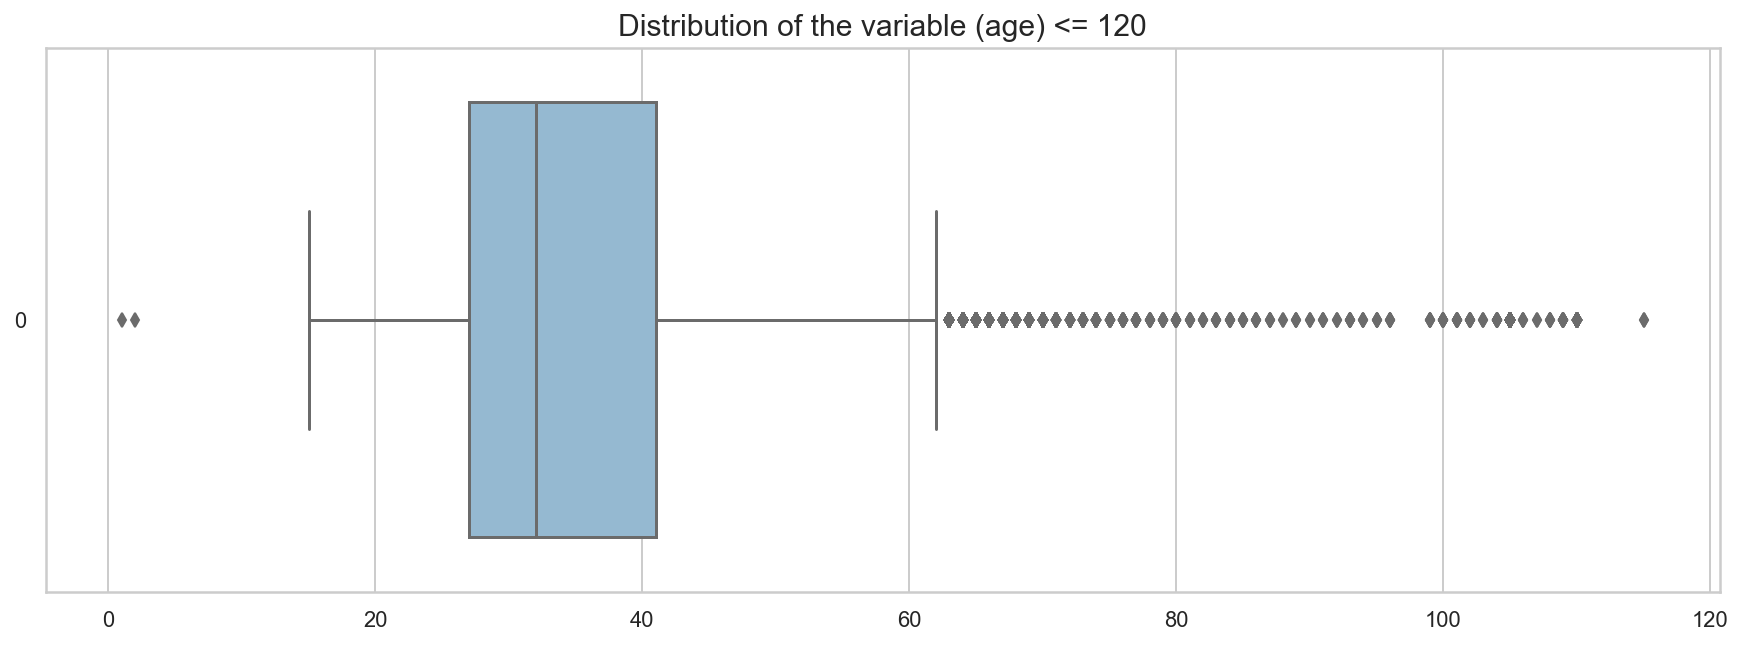

,count,mean,std,min,25%,50%,75%,max
age,41434.0,36.209466,14.243426,1.0,27.0,32.0,41.0,115.0


In [31]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

users_numerical = valid_users.query('age <= 120').age

sns.boxplot(data = users_numerical, orient = 'h')

# Formatting
ax.set_title('Distribution of the variable (age) <= 120', fontsize = 15)
plt.show()

users_numerical.describe().to_frame().T

## 6. Distribution of variables in ``sessions`` dataset 
------------------

The following part of the analysis will consist on a series of plots that show the distribution of the variables in ``sessions`` dataset (filtered to only select IDs present in both ``users`` and ``sessions`` datasets).

In [32]:
valid_sessions = (
    sessions_2
    .query('user_id in @valid_ids')
)
display(valid_sessions)

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
d1mm9tcy42,lookup,missing,missing,Windows Desktop,319.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
d1mm9tcy42,lookup,missing,missing,Windows Desktop,301.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
d1mm9tcy42,lookup,missing,missing,Windows Desktop,435.0
...,...,...,...,...,...
nw9fwlyb5f,index,data,reservations,iPhone,245.0
nw9fwlyb5f,unavailabilities,data,unavailable_dates,iPhone,286.0
nw9fwlyb5f,notifications,submit,notifications,iPhone,830.0


### 6.1 Distribution of the categorical variables

``sessions`` dataset's categorical variables contain a lot of different values, that will have to be preprocessed.

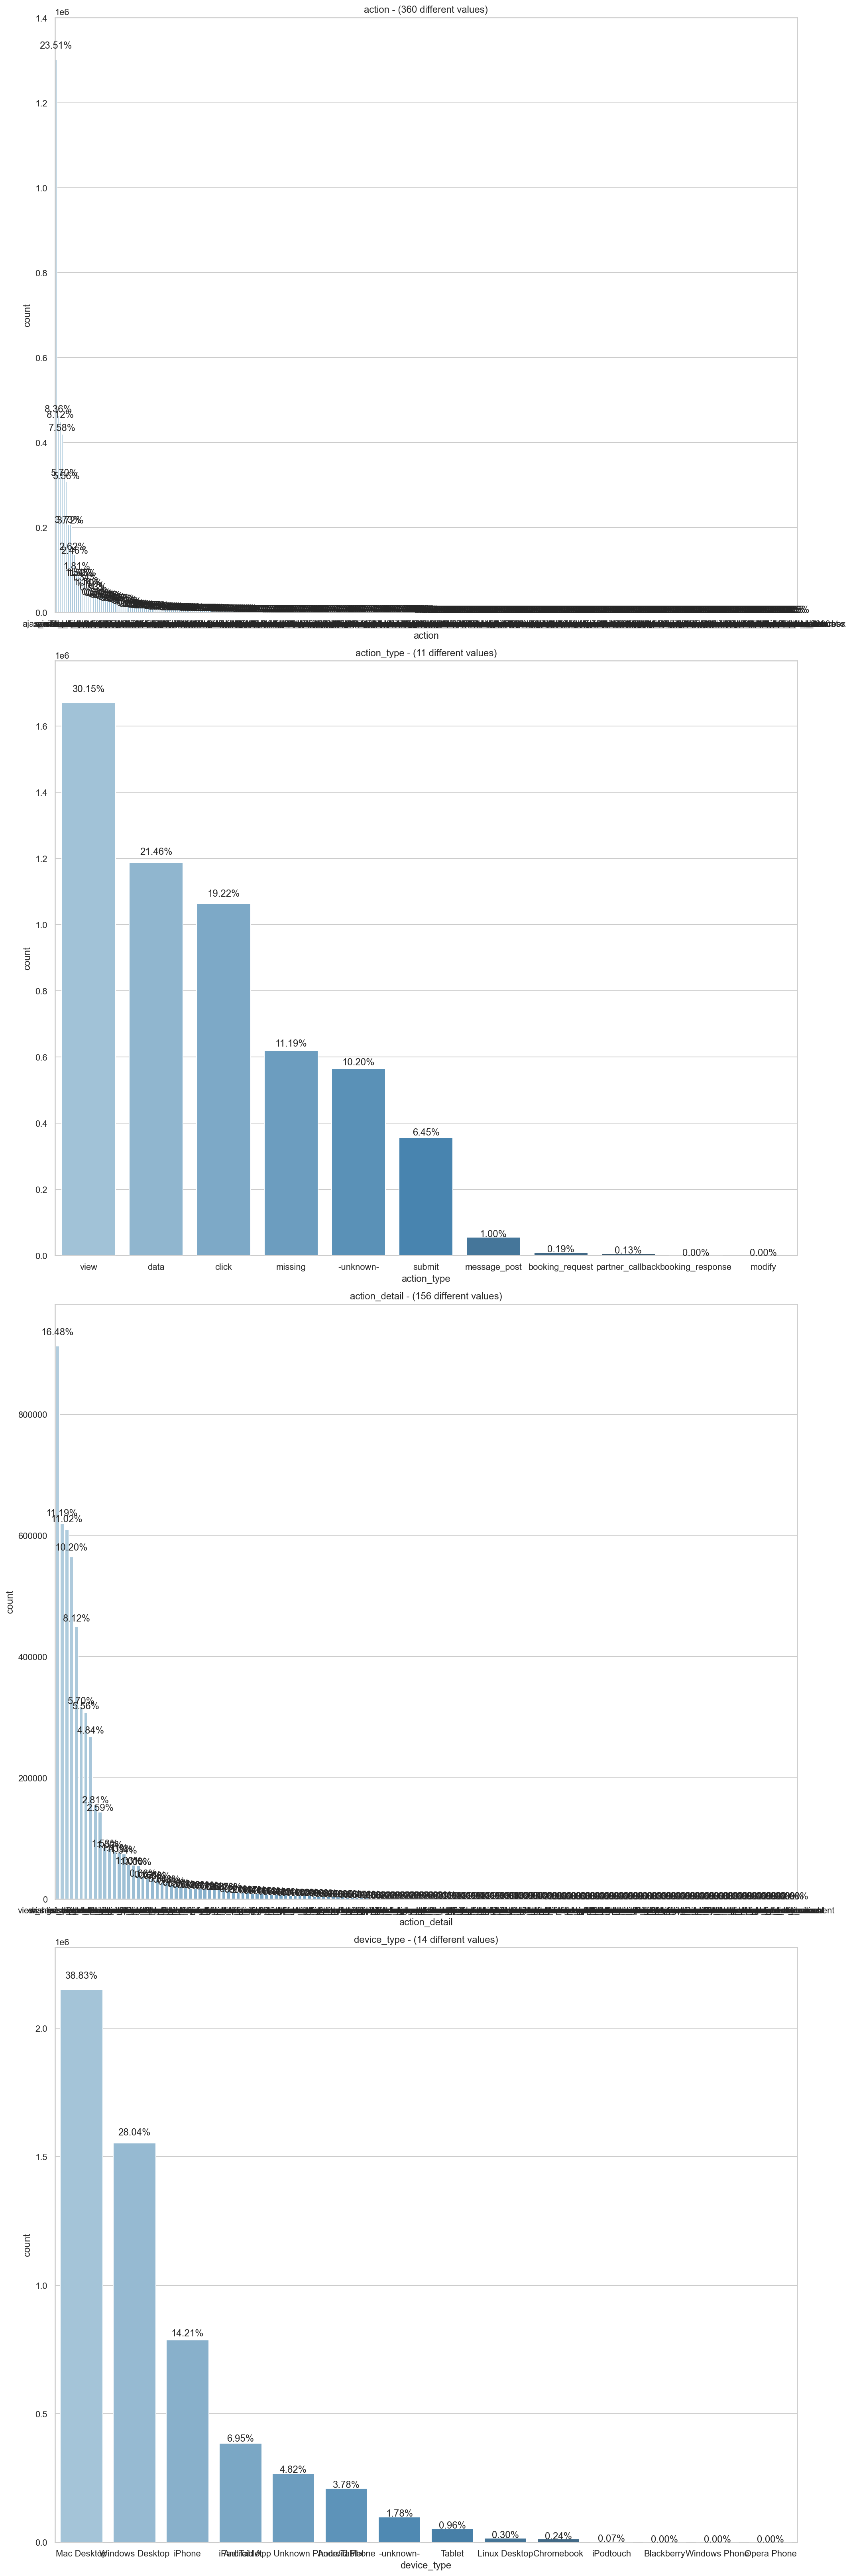

In [33]:
sessions_categorical = (
    valid_sessions
    .select_dtypes(['category'])
)

fig, ax = plt.subplots(sessions_categorical.columns.shape[0], 1, figsize = (15, 45))

for i, var in enumerate(sessions_categorical.columns):
    order = (
        sessions_categorical
        .loc[:, var]
        .value_counts()
    )
    plot = sns.countplot(
        x=var,
        data=sessions_categorical,
        palette="Blues_d",
        ax = ax[i],
        order=order.index
    )

    # Formatting
    column_autolabel(ax = plot, total_ratio = sessions_categorical.loc[:, var].count())

    title = (f"{var} - ({order.count()} different values)")
    ax[i].set_title(title)


fig.tight_layout()        
plt.show()

### 6.2 Distribution of the numerical variables <a class="anchor" id="6_2"></a>
The variance of the variable ``secs_elapsed`` is very high. This means that it will have to be studied in further detail and properly preprocessed.

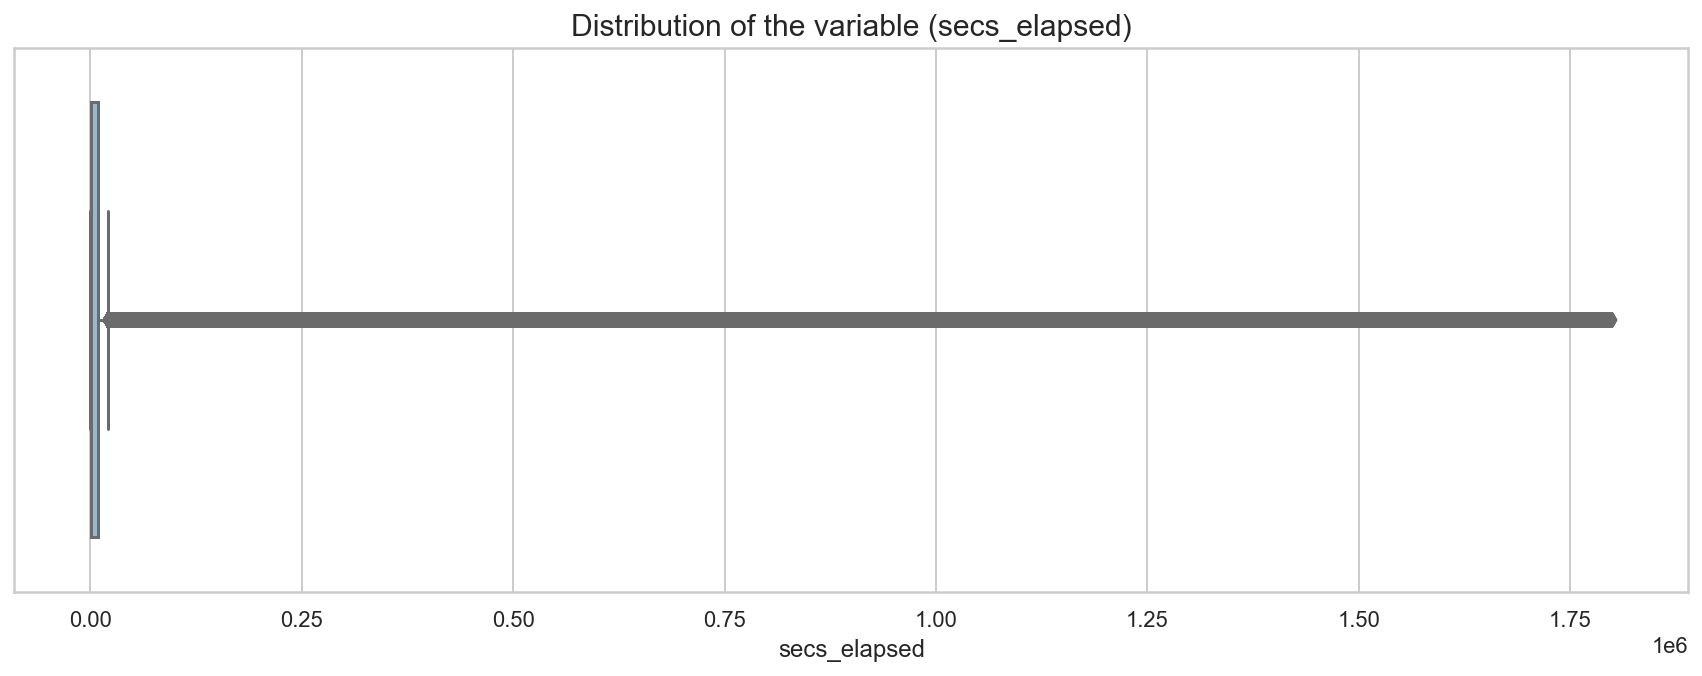

,count,mean,std,min,25%,50%,75%,max
secs_elapsed,5464142.0,20455.773934,92609.695072,0.0,236.0,1137.0,8493.0,1799977.0


In [34]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

sns.boxplot(data = valid_sessions, x = 'secs_elapsed')

# Formatting
ax.set_title('Distribution of the variable (secs_elapsed)', fontsize = 15)
plt.show()

valid_sessions.secs_elapsed.describe().to_frame().T